Ref: https://zhuanlan.zhihu.com/p/22692029

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

C:\Users\Mike\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


假设我们有回归模型 Y=β0+β1X1+⋯+βnXn+ε,并且有 k 组数据。
OLS 回归用于计算回归系数 βi 的估值 b0,b1,…,bn，使误差平方
![](images/OLS_square_item.png)最小化。


statsmodels.OLS 的输入有 (endog, exog, missing, hasconst) 四个，我们现在只考虑前两个。第一个输入 endog 是回归中的反应变量（也称因变量），是上面模型中的 y(t), 输入是一个长度为 k 的 array。第二个输入 exog 则是回归变量（也称自变量）的值，即模型中的x1(t),…,xn(t)。但是要注意，statsmodels.OLS 不会假设回归模型有常数项，所以我们应该假设模型是
![](images/OLS_model.png)

并且在数据中，对于所有 t=1,…,k，设置 x0(t)=1。因此，exog的输入是一个 k×(n+1) 的 array，其中最左一列的数值全为 1。往往输入的数据中，没有专门的数值全为1的一列，Statmodels 有直接解决这个问题的函数：sm.add_constant()。它会在一个 array 左侧加上一列 1。（本文中所有输入 array 的情况也可以使用同等的 list、pd.Series 或 pd.DataFrame。）

确切地说，statsmodels.OLS 是 statsmodels.regression.linear_model 里的一个函数（从这个命名也能看出，statsmodel 有很多很多功能，其中的一项叫回归）。它的输出结果是一个 statsmodels.regression.linear_model.OLS，只是一个类，并没有进行任何运算。在 OLS 的模型之上调用拟合函数 fit()，才进行回归运算，并且得到 statsmodels.regression.linear_model.RegressionResultsWrapper，它包含了这组数据进行回归拟合的结果摘要。调用 params 可以查看计算出的回归系数 b0,b1,…,bn。

简单的线性回归

上面的介绍绕了一个大圈圈，现在我们来看一个例子，假设回归公式是:
Y = 1 + 10X

我们从最简单的一元模型开始，虚构一组数据。首先设定数据量，也就是上面的 k 值。
然后创建一个 array，是上面的 x1 的数据。这里，我们想要 x1 的值从 0 到 10 等差排列。
使用 sm.add_constant() 在 array 上加入一列常项1。
然后设置模型里的 β0,β1，这里要设置成 1,10。
然后还要在数据中加上误差项，所以生成一个长度为k的正态分布样本。
由此，我们生成反应项 y(t)。

In [2]:
nsample = 100
x = np.linspace(0, 10, nsample)
X = sm.add_constant(x)

beta = np.array([1, 10])
e = np.random.normal(size=nsample)
y = np.dot(X, beta) + e


In [4]:
model = sm.OLS(y,X)
results = model.fit()
print(results.params)
print(results.summary())

[ 1.21791967  9.94379615]
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 1.104e+05
Date:                Mon, 30 Oct 2017   Prob (F-statistic):          2.21e-151
Time:                        03:07:58   Log-Likelihood:                -127.24
No. Observations:                 100   AIC:                             258.5
Df Residuals:                      98   BIC:                             263.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.2179     

还可以将拟合结果画出来。先调用拟合结果的 fittedvalues 得到拟合的 y 值。
画出原数据，图像为圆点，默认颜色为蓝。
画出拟合数据，图像为红色带点间断线。
放置注解。

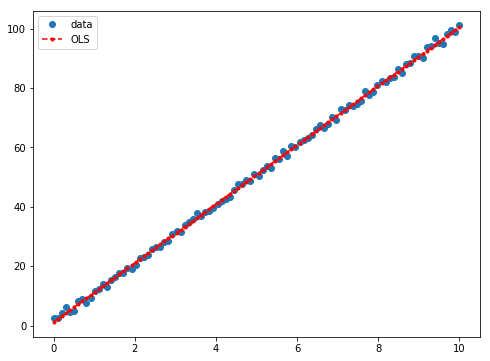

In [22]:
y_fitted = results.fittedvalues
fig, ax = plt.subplots(figsize=(8,6))
# https://matplotlib.org/devdocs/api/_as_gen/matplotlib.pyplot.subplots.html
#  fig : matplotlib.figure.Figure object
#  ax : Axes object or array of Axes objects.
    
ax.plot(x, y, 'o', label='data')
ax.plot(x, y_fitted, 'r--.',label='OLS')
ax.legend(loc='best')

在 0 到 2 的区间放大一下，可以见数据和拟合的关系。

(-1, 25)

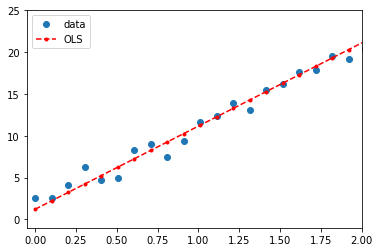

In [26]:
plt.plot(x, y, 'o', label='data')
plt.plot(x, y_fitted, 'r--.',label='OLS')
plt.legend(loc='best')
plt.xlim(-0.05, 2)
plt.ylim(-1, 25)

## 高次模型的回归

假设反应变量 Y 和回归变量 X 的关系是高次的多项式，即
Y = beta0 + beta1 X + beta2 X^2 + betan X^n
![](OLS_model_high_order.png)
我们依然可以使用 OLS 进行线性回归。但前提条件是，我们必须知道 X 在这个关系中的所有次方数。
虽然 X 和 Y 的关系不是线性的，但是 Y 和 X, X^2, ... ,X^n的关系是高元线性的。也就是说，只要我们把高次项当做其他的自变量，即设X_1=X, X_2=X^2, X_3=x^3
那么就回到了![](OLS_model.png)

举个例子： Y = 1 + 0.1 X + 10 X^2

首先设定数据量，也就是上面的 k 值。

然后创建一个 array，是上面的 x1 的数据。这里，我们想要 x1 的值从 0 到 10 等差排列。

再创建一个 k×2 的 array，两列分别为 x1 和 x2。我们需要 x2 为 x1 的平方。

使用 sm.add_constant() 在 array 上加入一列常项 1。

然后设置模型里的 β0,β1,β2，我们想设置成 1,0.1,10。

然后还要在数据中加上误差项，所以生成一个长度为k的正态分布样本。


由此，我们生成反应项 y(t)，它与 x1(t) 是二次多项式关系。


在反应变量和回归变量上使用 OLS() 函数。

然后获取拟合结果。
再调取计算出的回归系数。


得到

[ 0.95119465, 0.10235581, 9.9998477]
获取全部摘要

In [27]:

nsample = 100
x = np.linspace(0, 10, nsample)
X = np.column_stack((x, x**2))
X = sm.add_constant(X)
beta = np.array([1, 0.1, 10])
e = np.random.normal(size=nsample)
y = np.dot(X, beta) + e



model = sm.OLS(y,X)
results = model.fit()
print(results.params)
print(results.summary())

[  1.08310664  -0.08027884  10.0277416 ]
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 4.686e+06
Date:                Mon, 30 Oct 2017   Prob (F-statistic):          1.67e-242
Time:                        04:10:53   Log-Likelihood:                -138.99
No. Observations:                 100   AIC:                             284.0
Df Residuals:                      97   BIC:                             291.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      

## 哑变量

一般而言，有连续取值的变量叫做连续变量，它们的取值可以是任何的实数，或者是某一区间里的任何实数，比如股价、时间、身高。但有些性质不是连续的，只有有限个取值的可能性，一般是用于分辨类别，比如性别、婚姻情况、股票所属行业，表达这些变量叫做分类变量。在回归分析中，我们需要将分类变量转化为哑变量(dummy variable)。

如果我们想表达一个有 d 种取值的分类变量，那么它所对应的哑变量的取值是一个 d 元组（可以看成一个长度为 d 的向量），其中有一个元素为 1，其他都是 0。元素呈现出 1 的位置就是变量所取的类别。比如说，某个分类变量的取值是 {a,b,c,d}，那么类别 a 对应的哑变量是(1,0,0,0)，b 对应 (0,1,0,0)，c 对应 (0,0,1,0)，d 对应 (0,0,0,1)。这么做的用处是，假如 a、b、c、d 四种情况分别对应四个系数 β0,β1,β2,β3，设 (x0,x1,x2,x3) 是一个取值所对应的哑变量，那么
![](images/beta_times_x.png)
可以直接得出相应的系数

可以理解为，分类变量的取值本身只是分类，无法构成任何线性关系，但是若映射到高元的 0,1 点上，便可以用线性关系表达，从而进行回归。

Statsmodels 里有一个函数 categorical() 可以直接把类别 {0,1,…,d-1} 转换成所对应的元组。确切地说，sm.categorical() 的输入有 (data, col, dictnames, drop) 四个。其中，data 是一个 k×1 或 k×2 的 array，其中记录每一个样本的分类变量取值。drop 是一个 Bool值，意义为是否在输出中丢掉样本变量的值。中间两个输入可以不用在意。这个函数的输出是一个k×d 的 array（如果 drop=False，则是k×(d+1)），其中每一行是所对应的样本的哑变量；这里 d 是 data 中分类变量的类别总数。

我们来举一个例子。这里假设一个反应变量 Y 对应连续自变量 X 和一个分类变量 Z。常项系数为 10，XX 的系数为 1；Z 有 {a,b,c}三个种类，其中 a 类有系数 1，b 类有系数 3，c 类有系数 8。也就是说，将 Z 转换为哑变量 (Z1,Z2,Z3)，其中 Zi 取值于 0,1，有线性公式

Y = 10 + X + Z_1 + 3 Z_2 + 8 Z_3

先定义样本数量为 50。
设定分类变量的 array。前 20 个样本分类为 a。
之后的 20 个样本分类为 b。
最后 10 个是 c 类。
转变成哑变量。

创建一组连续变量，是 50 个从 0 到 20 递增的值。
将连续变量和哑变量的 array 合并，并加上一列常项。

定义回归系数。我们想设定常项系数为 10，唯一的连续变量的系数为 1，并且分类变量的三种分类 a、b、c 的系数分别为 1,3,8。

再生成一个正态分布的噪音样本。
最后，生成反映变量。

得到了虚构数据后，放入 OLS 模型并进行拟合运算。

In [29]:
nsample = 50

groups = np.zeros(nsample, int)
groups[20:40] = 1
groups[40:] = 2
dummy = sm.categorical(groups, drop=True)



x = np.linspace(0, 20, nsample)
X = np.column_stack((x, dummy))
X = sm.add_constant(X)

beta = [10, 1, 1, 3, 8]

e = np.random.normal(size=nsample)

y = np.dot(X, beta) + e


result = sm.OLS(y,X).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.984
Model:                            OLS   Adj. R-squared:                  0.983
Method:                 Least Squares   F-statistic:                     918.3
Date:                Mon, 30 Oct 2017   Prob (F-statistic):           4.92e-41
Time:                        04:17:36   Log-Likelihood:                -74.498
No. Observations:                  50   AIC:                             157.0
Df Residuals:                      46   BIC:                             164.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         10.4294      0.634     16.446      0.0

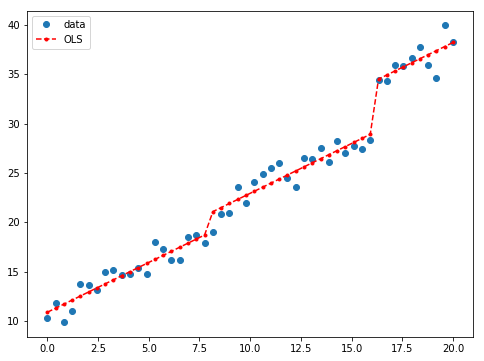

In [30]:
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(x, y, 'o', label="data")
ax.plot(x, result.fittedvalues, 'r--.', label="OLS")
ax.legend(loc='best')

这里要指出，哑变量是和其他自变量并行的影响因素，也就是说，哑变量和原先的 x 同时影响了回归的结果。初学者往往会误解这一点，认为哑变量是一个选择变量：也就是说，上图中给出的回归结果，是在只做了一次回归的情况下完成的，而不是分成３段进行３次回归。哑变量的取值藏在其他的三个维度中。可以理解成：上图其实是将高元的回归结果映射到平面上之后得到的图。